# import relevant libraries

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow.keras.layers as layers
from tensorflow.keras import Sequential
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set()

# Loading the training and test dataset

In [126]:
main_dir = "D:/Books/Machine Learning/Real_World_project/Titanic/dataset/"     # main directory of the dataset

In [127]:
train_dir = f"{main_dir}train.csv"          #dir of the training set
test_dir = f"{main_dir}test.csv"            #dir of the test set

In [128]:
# loading the datasets

train = pd.read_csv(train_dir, index_col='PassengerId')      
test = pd.read_csv(test_dir, index_col='PassengerId')

In [129]:
# add "survived" column to the test set and append to the training set

test['Survived'] = -1                  
data = train.append(test)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,-1,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,-1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,-1,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [130]:
# droping non-significant columns
data = data.drop(['Name','Ticket'], axis=1)       

# filling NAN values
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S


In [131]:
data['Sex'] = data['Sex'].map({'female':0, 'male':1})  #mapping male/fenale values to 1/0 respectively
data['Cabin'] = data['Cabin'].apply(lambda x: 1 if type(x) is str else 0)     #if the passenger had cabin

data = pd.get_dummies(data, drop_first=True, columns=['Embarked'])
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,1,22.000000,1,0,7.2500,0,0,1
2,1,1,0,38.000000,1,0,71.2833,1,0,0
3,1,3,0,26.000000,0,0,7.9250,0,0,1
4,1,1,0,35.000000,1,0,53.1000,1,0,1
5,0,3,1,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1305,-1,3,1,29.881138,0,0,8.0500,0,0,1
1306,-1,1,0,39.000000,0,0,108.9000,1,0,0
1307,-1,3,1,38.500000,0,0,7.2500,0,0,1


In [132]:
std_scalar = StandardScaler()
std_scalar.fit(train[['Age', 'Fare']])

StandardScaler()

In [133]:
data[['Age', 'Fare']] = std_scalar.transform(data[['Age', 'Fare']])

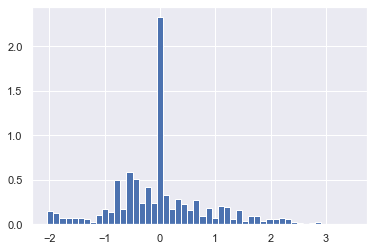

In [137]:
plt.hist(data['Age'], bins=50, density=True);

In [138]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,1,-0.530377,1,0,-0.502445,0,0,1
2,1,1,0,0.571831,1,0,0.786845,1,0,0
3,1,3,0,-0.254825,0,0,-0.488854,0,0,1
4,1,1,0,0.365167,1,0,0.420730,1,0,1
5,0,3,1,0.365167,0,0,-0.486337,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1305,-1,3,1,0.012539,0,0,-0.486337,0,0,1
1306,-1,1,0,0.640719,0,0,1.544246,1,0,0
1307,-1,3,1,0.606275,0,0,-0.502445,0,0,1


In [139]:
X_train = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked_Q', 
                 'Embarked_S']].to_numpy()[:train.shape[0], :]
X_test = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked_Q', 
                 'Embarked_S']].to_numpy()[train.shape[0]:, :]

In [140]:
y_train = data['Survived'].to_numpy()[:train.shape[0]]
y_test = data['Survived'].to_numpy()[train.shape[0]:]

In [141]:
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape:  ', X_test.shape)
print('y_test.shape:  ', y_test.shape)

X_train.shape:  (891, 9)
y_train.shape:  (891,)
X_test.shape:   (418, 9)
y_test.shape:   (418,)


# Test and train split

In [142]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [143]:
X_train.shape

(712, 9)

# Neural Network Classifier


In [ ]:
model = Sequential()
model.add(layers.Dense(64, input_shape=(X_train.shape[1], ), activation='relu'))
model.add(layers.Dense(1, activation='softmax'))


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=128)

# Decision Tree Classifier

In [176]:
dt = RandomForestClassifier(n_estimators=200, max_depth=5)

In [177]:
dt.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [178]:
accuracy_score(y_train, dt.predict(X_train))

0.8497191011235955

In [179]:
accuracy_score(y_val, dt.predict(X_val))

0.8491620111731844